In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/xiaohei/Documents/Duke/Courses/526 Data Science/Project/compsci526-project/readmission_features_30d_v1.csv"
df = pd.read_csv(file_path)
print(f"原始数据形状: {df.shape}")
df.head()

原始数据形状: (546028, 51)


,subject_id,hadm_id,admittime,dischtime,readmit_label,days_since_prev_discharge,has_prior_admission,ed_visit_flag,ed_los_hours,length_of_stay,...,UreaNitrogen_median,WBC_median,Creatinine_max,Glucose_max,Hemoglobin_max,PlateletCount_max,Potassium_max,Sodium_max,UreaNitrogen_max,WBC_max
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0,NaN,0,1,4.216667,0.786111,...,25.0,NaN,0.3,99.0,12.7,71.0,4.5,137.0,25.0,NaN
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,1,50.0,1,1,5.616667,1.015278,...,29.0,13.0,0.3,71.0,12.4,137.0,5.2,126.0,29.0,13.0
2,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,1,25.0,1,1,8.100000,2.222222,...,33.0,NaN,0.5,121.0,11.9,95.0,5.2,132.0,35.0,NaN
3,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,0,11.0,1,1,4.766667,1.754167,...,29.0,NaN,0.6,102.0,12.1,133.0,6.9,126.0,37.0,NaN
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,0,NaN,0,1,8.516667,0.298611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Value

In [31]:
# 查看缺失比例
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

ethnicity                    1.000000
WBC_median                   0.822480
WBC_min                      0.822480
WBC_max                      0.822480
days_since_prev_discharge    0.409232
discharge_location           0.274378
Glucose_max                  0.254154
Glucose_min                  0.254154
Glucose_median               0.254154
Sodium_min                   0.249498
Sodium_max                   0.249498
Sodium_median                0.249498
Potassium_max                0.246315
Potassium_min                0.246315
Potassium_median             0.246315
UreaNitrogen_max             0.245702
UreaNitrogen_min             0.245702
UreaNitrogen_median          0.245702
Creatinine_min               0.238440
Creatinine_median            0.238440
Creatinine_max               0.238440
Hemoglobin_median            0.226159
Hemoglobin_min               0.226159
Hemoglobin_max               0.226159
PlateletCount_median         0.223509
PlateletCount_min            0.223509
PlateletCoun

#### delete ethnicity 

In [32]:
if "ethnicity" in df.columns:
    df.drop(columns=["ethnicity"], inplace=True)
    print("✅ 已删除列: ethnicity")

✅ 已删除列: ethnicity


In [33]:
df.shape

(546028, 50)

#### 按行删除缺失过多的样本

In [34]:
row_missing_threshold = 0.50

# 计算每行缺失比例
row_missing_ratio = df.isnull().mean(axis=1)

# 统计将被删除的行数
rows_to_drop = (row_missing_ratio > row_missing_threshold).sum()
print(f"将删除 {rows_to_drop:,} 行（缺失比例 > {row_missing_threshold*100:.0f}%）")

# 删除这些行
df = df.loc[row_missing_ratio <= row_missing_threshold].reset_index(drop=True)

# 检查删除后的数据形状
print(f"✅ 删除完成，当前数据形状: {df.shape}")


将删除 39,609 行（缺失比例 > 50%）
✅ 删除完成，当前数据形状: (506419, 50)


In [35]:
if 'discharge_location' in df.columns:
    df['discharge_location'].fillna('UNKNOWN', inplace=True)
    
# Fill categorical variables with 'UNKNOWN'
categorical_cols = ['language', 'marital_status', 'last_service']
for col in categorical_cols:
    if col in df.columns:
        df[col].fillna('UNKNOWN', inplace=True)

/var/folders/zz/6_300q_s6271hbkb3fpd2jnw0000gn/T/ipykernel_10459/11827127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discharge_location'].fillna('UNKNOWN', inplace=True)
/var/folders/zz/6_300q_s6271hbkb3fpd2jnw0000gn/T/ipykernel_10459/11827127.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [36]:
# 查看缺失比例
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

WBC_max                      0.808595
WBC_min                      0.808595
WBC_median                   0.808595
days_since_prev_discharge    0.364680
Glucose_max                  0.195818
Glucose_median               0.195818
Glucose_min                  0.195818
Sodium_max                   0.190799
Sodium_median                0.190799
Sodium_min                   0.190799
Potassium_max                0.187367
Potassium_median             0.187367
Potassium_min                0.187367
UreaNitrogen_max             0.186705
UreaNitrogen_median          0.186705
UreaNitrogen_min             0.186705
Creatinine_max               0.178876
Creatinine_min               0.178876
Creatinine_median            0.178876
Hemoglobin_max               0.165634
Hemoglobin_median            0.165634
Hemoglobin_min               0.165634
PlateletCount_max            0.162776
PlateletCount_median         0.162776
PlateletCount_min            0.162776
insurance                    0.010367
is_surgical_

#### 对于缺失值小于20%

In [37]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# --------------------------------------------
# Step 1️⃣ 选取数值列并计算缺失比例
# --------------------------------------------
num_cols = df.select_dtypes(include=["float", "int"]).columns
num_cols = [c for c in num_cols if c not in ["subject_id", "hadm_id"]]

missing_ratio = df[num_cols].isnull().mean()

# ✅ 只保留缺失率 > 0 且 ≤ 20% 的列
target_cols = missing_ratio[(missing_ratio > 0) & (missing_ratio <= 0.20)].index.tolist()

print(f"📊 缺失比例在 0–20% 的数值列数: {len(target_cols)}")
display(missing_ratio[(missing_ratio > 0) & (missing_ratio <= 0.20)].sort_values(ascending=False))

# --------------------------------------------
# Step 2️⃣ 使用 IterativeImputer 进行多变量插补
# --------------------------------------------
imputer = IterativeImputer(max_iter=10, random_state=42)

# 拟合并插补这些列
df[target_cols] = imputer.fit_transform(df[target_cols])

# --------------------------------------------
# Step 3️⃣ 检查插补结果
# --------------------------------------------
missing_after = df[target_cols].isnull().mean()
compare = pd.DataFrame({
    "Before": missing_ratio[target_cols],
    "After": missing_after
}).sort_values("Before", ascending=False)

print("\n✅ 插补完成！前后缺失比例对比：")
display(compare.head(15))


📊 缺失比例在 0–20% 的数值列数: 22


Glucose_median          0.195818
Glucose_min             0.195818
Glucose_max             0.195818
Sodium_max              0.190799
Sodium_min              0.190799
Sodium_median           0.190799
Potassium_median        0.187367
Potassium_min           0.187367
Potassium_max           0.187367
UreaNitrogen_median     0.186705
UreaNitrogen_max        0.186705
UreaNitrogen_min        0.186705
Creatinine_min          0.178876
Creatinine_median       0.178876
Creatinine_max          0.178876
Hemoglobin_median       0.165634
Hemoglobin_min          0.165634
Hemoglobin_max          0.165634
PlateletCount_median    0.162776
PlateletCount_max       0.162776
PlateletCount_min       0.162776
is_surgical_service     0.000026
dtype: float64


✅ 插补完成！前后缺失比例对比：


,Before,After
Glucose_median,0.195818,0.0
Glucose_min,0.195818,0.0
Glucose_max,0.195818,0.0
Sodium_max,0.190799,0.0
Sodium_min,0.190799,0.0
Sodium_median,0.190799,0.0
Potassium_median,0.187367,0.0
Potassium_min,0.187367,0.0
Potassium_max,0.187367,0.0
UreaNitrogen_median,0.186705,0.0


In [38]:
# 查看缺失比例
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

WBC_max                      0.808595
WBC_min                      0.808595
WBC_median                   0.808595
days_since_prev_discharge    0.364680
insurance                    0.010367
admission_location           0.000002
PlateletCount_median         0.000000
PlateletCount_min            0.000000
Potassium_min                0.000000
Sodium_min                   0.000000
UreaNitrogen_min             0.000000
Creatinine_median            0.000000
Glucose_median               0.000000
Hemoglobin_median            0.000000
Potassium_median             0.000000
Glucose_min                  0.000000
Sodium_median                0.000000
UreaNitrogen_median          0.000000
Creatinine_max               0.000000
Glucose_max                  0.000000
Hemoglobin_max               0.000000
PlateletCount_max            0.000000
Potassium_max                0.000000
Sodium_max                   0.000000
UreaNitrogen_max             0.000000
Hemoglobin_min               0.000000
subject_id  

#### 对于WBC

/var/folders/zz/6_300q_s6271hbkb3fpd2jnw0000gn/T/ipykernel_10459/1220386891.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('subject_id', group_keys=False).apply(interpolate_wbc_per_patient)
/var/folders/zz/6_300q_s6271hbkb3fpd2jnw0000gn/T/ipykernel_10459/1220386891.py:47: UserWarning: Glyph 8313 (\N{SUPERSCRIPT NINE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8313 (\N{SUPERSCRIPT NINE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


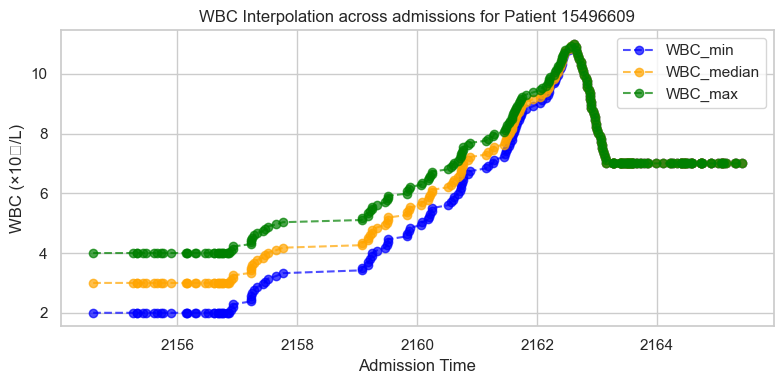

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 转换时间列并排序
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df = df.sort_values(['subject_id', 'admittime']).reset_index(drop=True)

# ==============================
# 2️⃣ 对每个病人按入院时间线性插值 WBC 系列
# ==============================
wbc_cols = ['WBC_min', 'WBC_median', 'WBC_max']

def interpolate_wbc_per_patient(group):
    group = group.copy()
    for col in wbc_cols:
        if col in group.columns:
            group[col] = group[col].interpolate(method='linear', limit_direction='both')
    return group

df = df.groupby('subject_id', group_keys=False).apply(interpolate_wbc_per_patient)

# ==============================
# 3️⃣ 限制医学合理范围
# ==============================
for col in wbc_cols:
    if col in df.columns:
        df[col] = df[col].clip(lower=0.5, upper=50)

# ==============================
# 4️⃣ 可视化：示例病人插值效果
# ==============================
example_id = df['subject_id'].value_counts().index[0]  # 检测次数最多的病人
sample = df[df['subject_id'] == example_id]

plt.figure(figsize=(8, 4))
for col, color in zip(wbc_cols, ['blue', 'orange', 'green']):
    plt.plot(sample['admittime'], sample[col], 'o--', label=col, alpha=0.7, color=color)

plt.title(f"WBC Interpolation across admissions for Patient {example_id}")
plt.xlabel("Admission Time")
plt.ylabel("WBC (×10⁹/L)")
plt.legend()
plt.tight_layout()
plt.show()



In [44]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

WBC_max                      0.475045
WBC_min                      0.475045
WBC_median                   0.475045
days_since_prev_discharge    0.364680
insurance                    0.010367
admission_location           0.000002
PlateletCount_median         0.000000
PlateletCount_min            0.000000
Potassium_min                0.000000
Sodium_min                   0.000000
UreaNitrogen_min             0.000000
Creatinine_median            0.000000
Glucose_median               0.000000
Hemoglobin_median            0.000000
Potassium_median             0.000000
Glucose_min                  0.000000
Sodium_median                0.000000
UreaNitrogen_median          0.000000
Creatinine_max               0.000000
Glucose_max                  0.000000
Hemoglobin_max               0.000000
PlateletCount_max            0.000000
Potassium_max                0.000000
Sodium_max                   0.000000
UreaNitrogen_max             0.000000
Hemoglobin_min               0.000000
subject_id  

#### days_since_prev_discharge

In [ ]:

# 确保 admittime 是时间格式，并按 subject_id + admittime 排序
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df = df.sort_values(['subject_id', 'admittime']).reset_index(drop=True)

# ==============================
# 2️⃣ 检查首次入院并填补 days_since_prev_discharge
# ==============================
# 每个病人的第一条记录 → 没有上次出院
df['is_first_admission'] = df.groupby('subject_id').cumcount() == 0

# 如果是首次入院，则填999
df.loc[df['is_first_admission'], 'days_since_prev_discharge'] = 999

# 打印确认
print("✅ 已完成首次入院识别与填补。")
print(df[['subject_id', 'admittime', 'days_since_prev_discharge', 'is_first_admission']].head(10))

✅ 已完成首次入院识别与填补。
   subject_id           admittime  days_since_prev_discharge  \
0    10000032 2180-05-06 22:23:00                      999.0   
1    10000032 2180-06-26 18:27:00                       50.0   
2    10000032 2180-07-23 12:35:00                       25.0   
3    10000032 2180-08-05 23:44:00                       11.0   
4    10000084 2160-11-21 01:56:00                      999.0   
5    10000084 2160-12-28 05:11:00                       32.0   
6    10000117 2181-11-15 02:05:00                      999.0   
7    10000117 2183-09-18 18:10:00                      672.0   
8    10000161 2163-08-20 01:42:00                      999.0   
9    10000248 2192-11-30 01:25:00                      999.0   

   is_first_admission  
0                True  
1               False  
2               False  
3               False  
4                True  
5               False  
6                True  
7               False  
8                True  
9                True  


In [46]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

WBC_max                      0.475045
WBC_min                      0.475045
WBC_median                   0.475045
insurance                    0.010367
admission_location           0.000002
subject_id                   0.000000
PlateletCount_median         0.000000
PlateletCount_min            0.000000
Potassium_min                0.000000
Sodium_min                   0.000000
UreaNitrogen_min             0.000000
Creatinine_median            0.000000
Glucose_median               0.000000
Hemoglobin_median            0.000000
Potassium_median             0.000000
Glucose_min                  0.000000
Sodium_median                0.000000
UreaNitrogen_median          0.000000
Creatinine_max               0.000000
Glucose_max                  0.000000
Hemoglobin_max               0.000000
PlateletCount_max            0.000000
Potassium_max                0.000000
Sodium_max                   0.000000
UreaNitrogen_max             0.000000
Hemoglobin_min               0.000000
death_within

# outlier

In [39]:
df.dtypes

subject_id                     int64
hadm_id                        int64
admittime                     object
dischtime                     object
readmit_label                  int64
days_since_prev_discharge    float64
has_prior_admission            int64
ed_visit_flag                  int64
ed_los_hours                 float64
length_of_stay               float64
num_transfers                float64
unique_careunits             float64
had_icu_transfer_flag        float64
last_service                  object
is_surgical_service          float64
gender                        object
anchor_age                     int64
language                      object
marital_status                object
insurance                     object
admission_type                object
admission_location            object
discharge_location            object
num_diagnoses                float64
died_in_hospital               int64
death_within_window            int64
Creatinine_min               float64
G

数值列数量: 38
示例列: ['readmit_label', 'days_since_prev_discharge', 'has_prior_admission', 'ed_visit_flag', 'ed_los_hours', 'length_of_stay', 'num_transfers', 'unique_careunits', 'had_icu_transfer_flag', 'is_surgical_service']


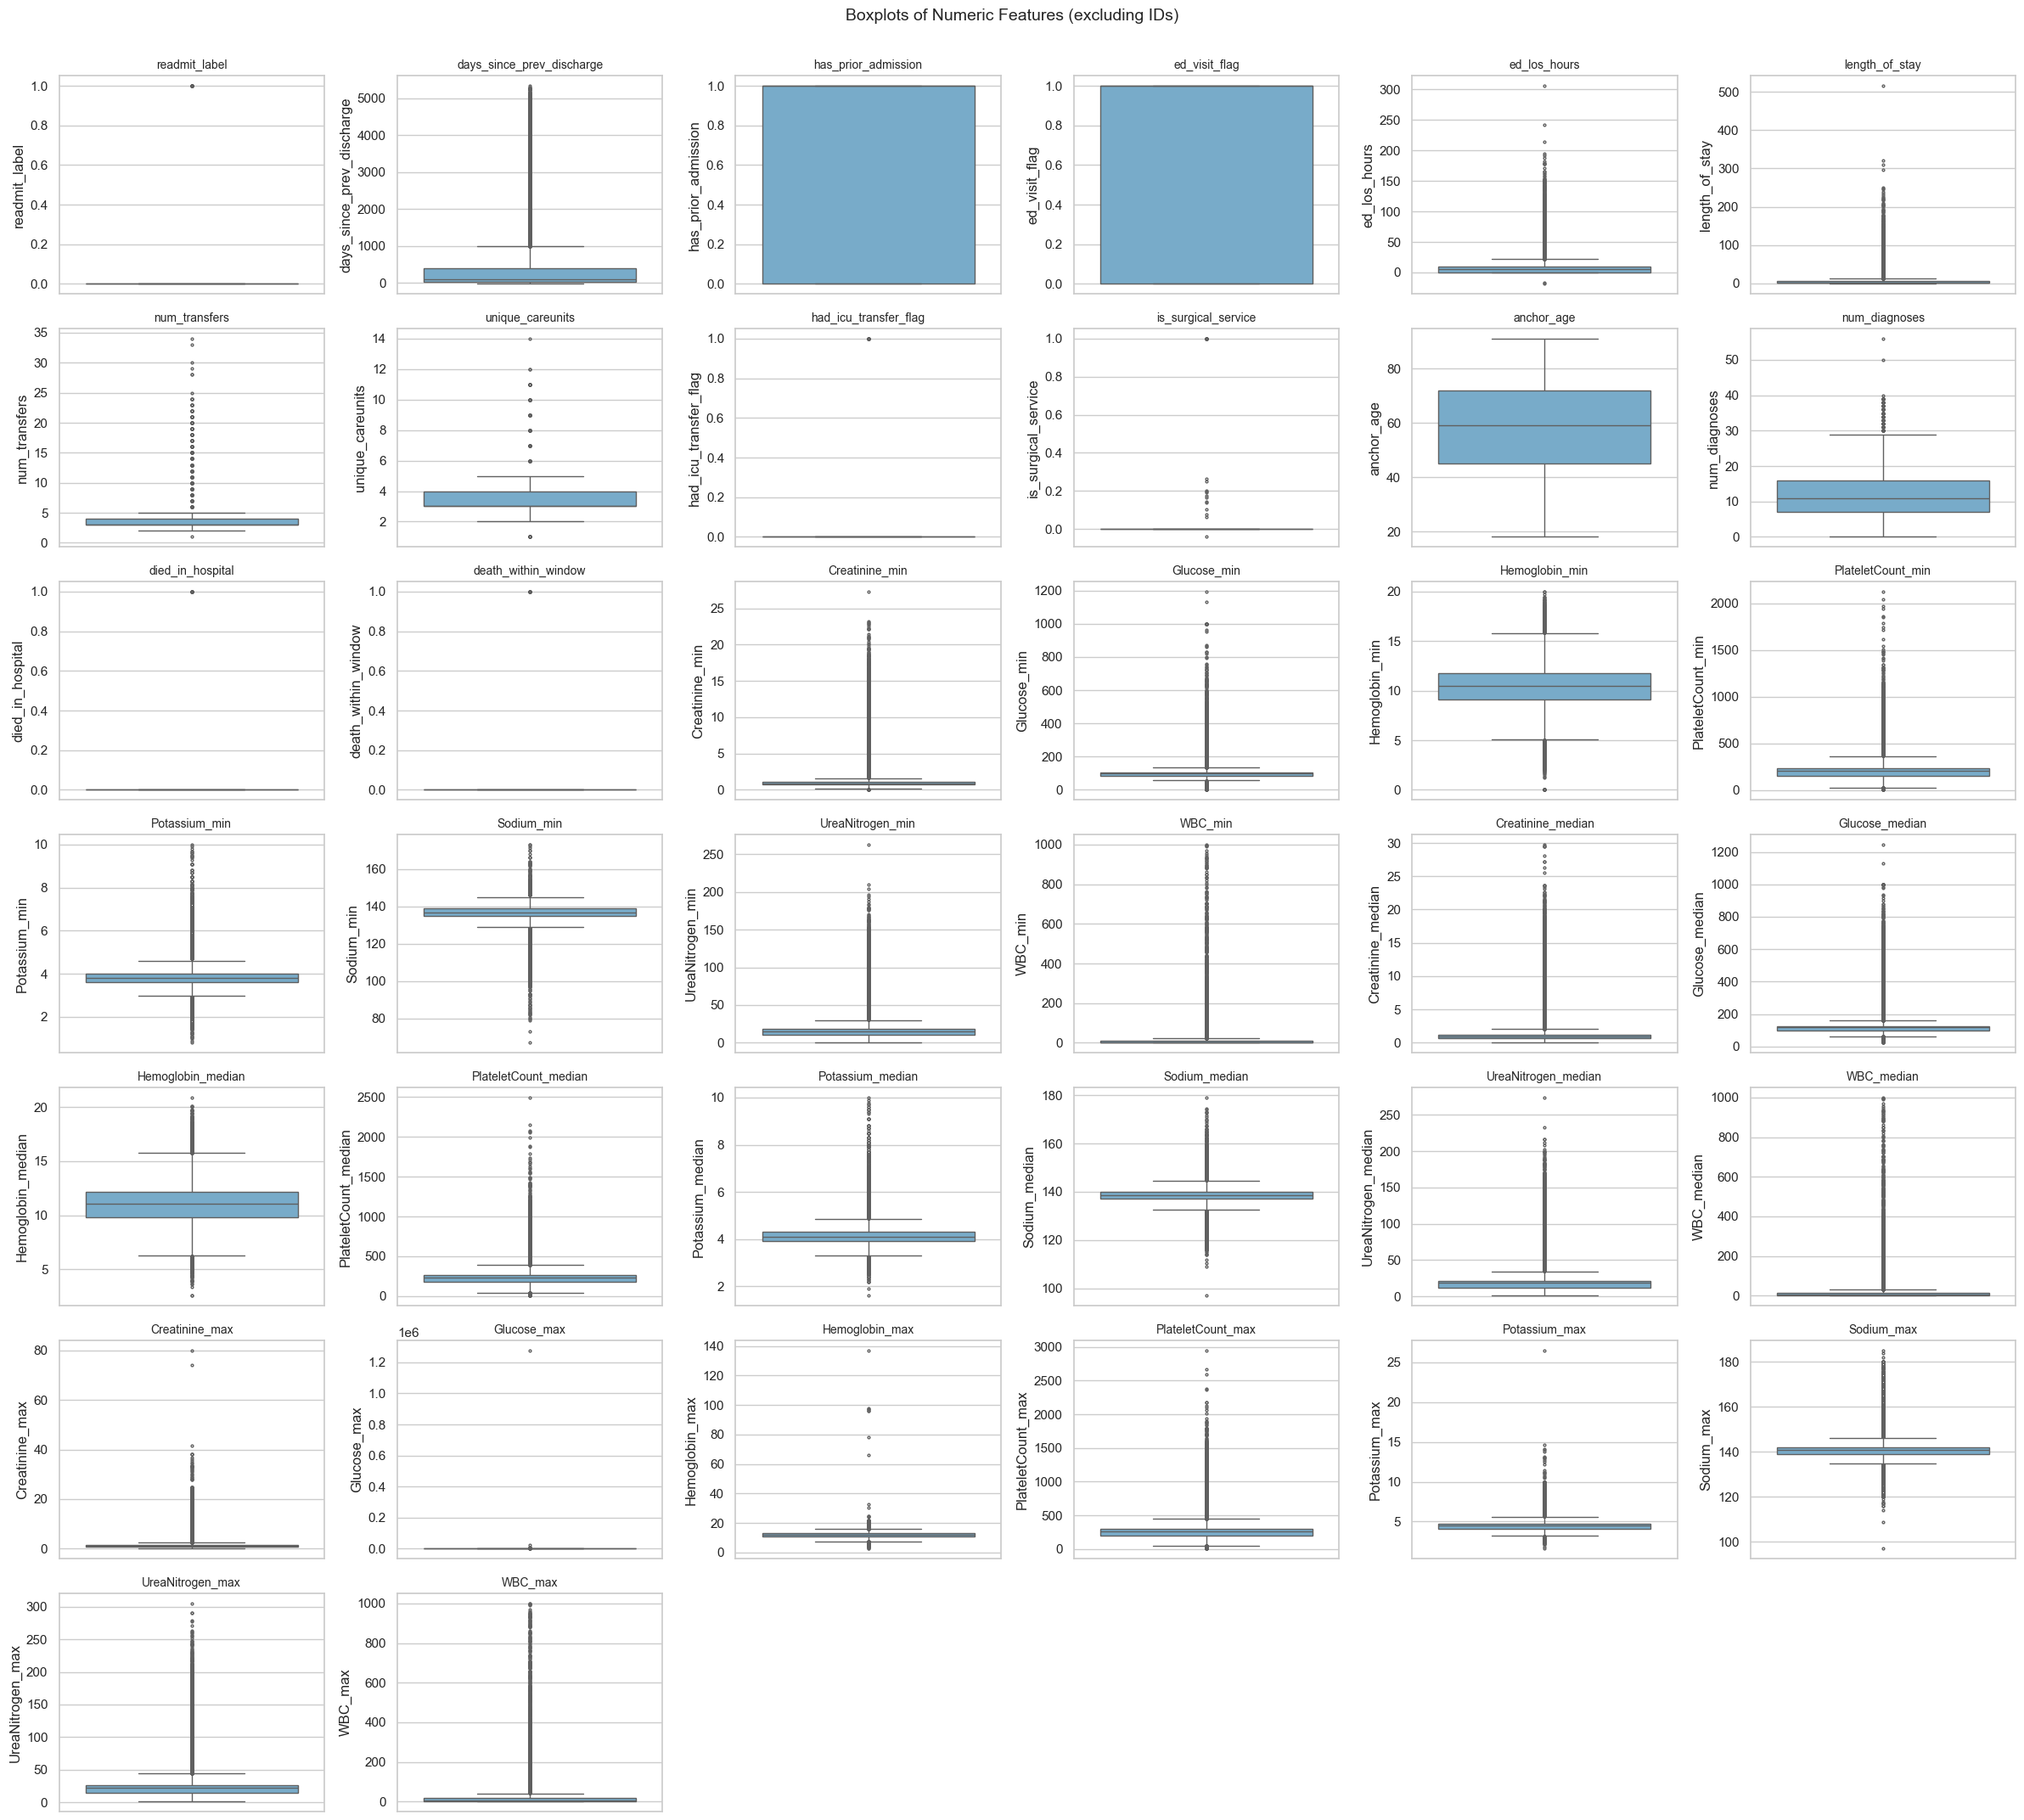

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选数值列（排除 ID）
num_cols = df.select_dtypes(include=['float', 'int']).columns
num_cols = [c for c in num_cols if c not in ['hadm_id', 'subject_id']]

print(f"数值列数量: {len(num_cols)}")
print("示例列:", num_cols[:10])

# 统一绘图样式
sns.set(style="whitegrid", palette="pastel")

# 如果列很多，分批画（每行6个图）
cols_per_row = 6
num_plots = len(num_cols)
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 4, num_rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, cols_per_row, i)
    sns.boxplot(y=df[col], color="#6baed6", fliersize=2)
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots of Numeric Features (excluding IDs)", fontsize=14, y=1.02)
plt.show()


In [41]:
import numpy as np

# ---- 1. 基于分位数裁剪 ----
num_cols = df.select_dtypes(include=['float', 'int']).columns
num_cols = [c for c in num_cols if c not in ['hadm_id', 'subject_id']]

for col in num_cols:
    if not any(lab in col for lab in ['WBC','Hemoglobin','PlateletCount','Sodium','Potassium','Creatinine','UreaNitrogen','Glucose']):
        q_low, q_high = df[col].quantile([0.01, 0.99])
        df[col] = np.clip(df[col], q_low, q_high)

# ---- 2. 基于医学范围裁剪 ----
lab_ranges = {
    'WBC': (0.5, 50),
    'Hemoglobin': (3, 20),
    'PlateletCount': (10, 2000),
    'Sodium': (100, 180),
    'Potassium': (1.5, 8.0),
    'Creatinine': (0.1, 15.0),
    'UreaNitrogen': (1, 200),
    'Glucose': (20, 800)
}
for lab, (low, high) in lab_ranges.items():
    for col in [c for c in df.columns if lab in c]:
        df[col] = np.clip(df[col], low, high)

print("✅ 已完成异常值裁剪。")


✅ 已完成异常值裁剪。


数值列数量: 38
示例列: ['readmit_label', 'days_since_prev_discharge', 'has_prior_admission', 'ed_visit_flag', 'ed_los_hours', 'length_of_stay', 'num_transfers', 'unique_careunits', 'had_icu_transfer_flag', 'is_surgical_service']


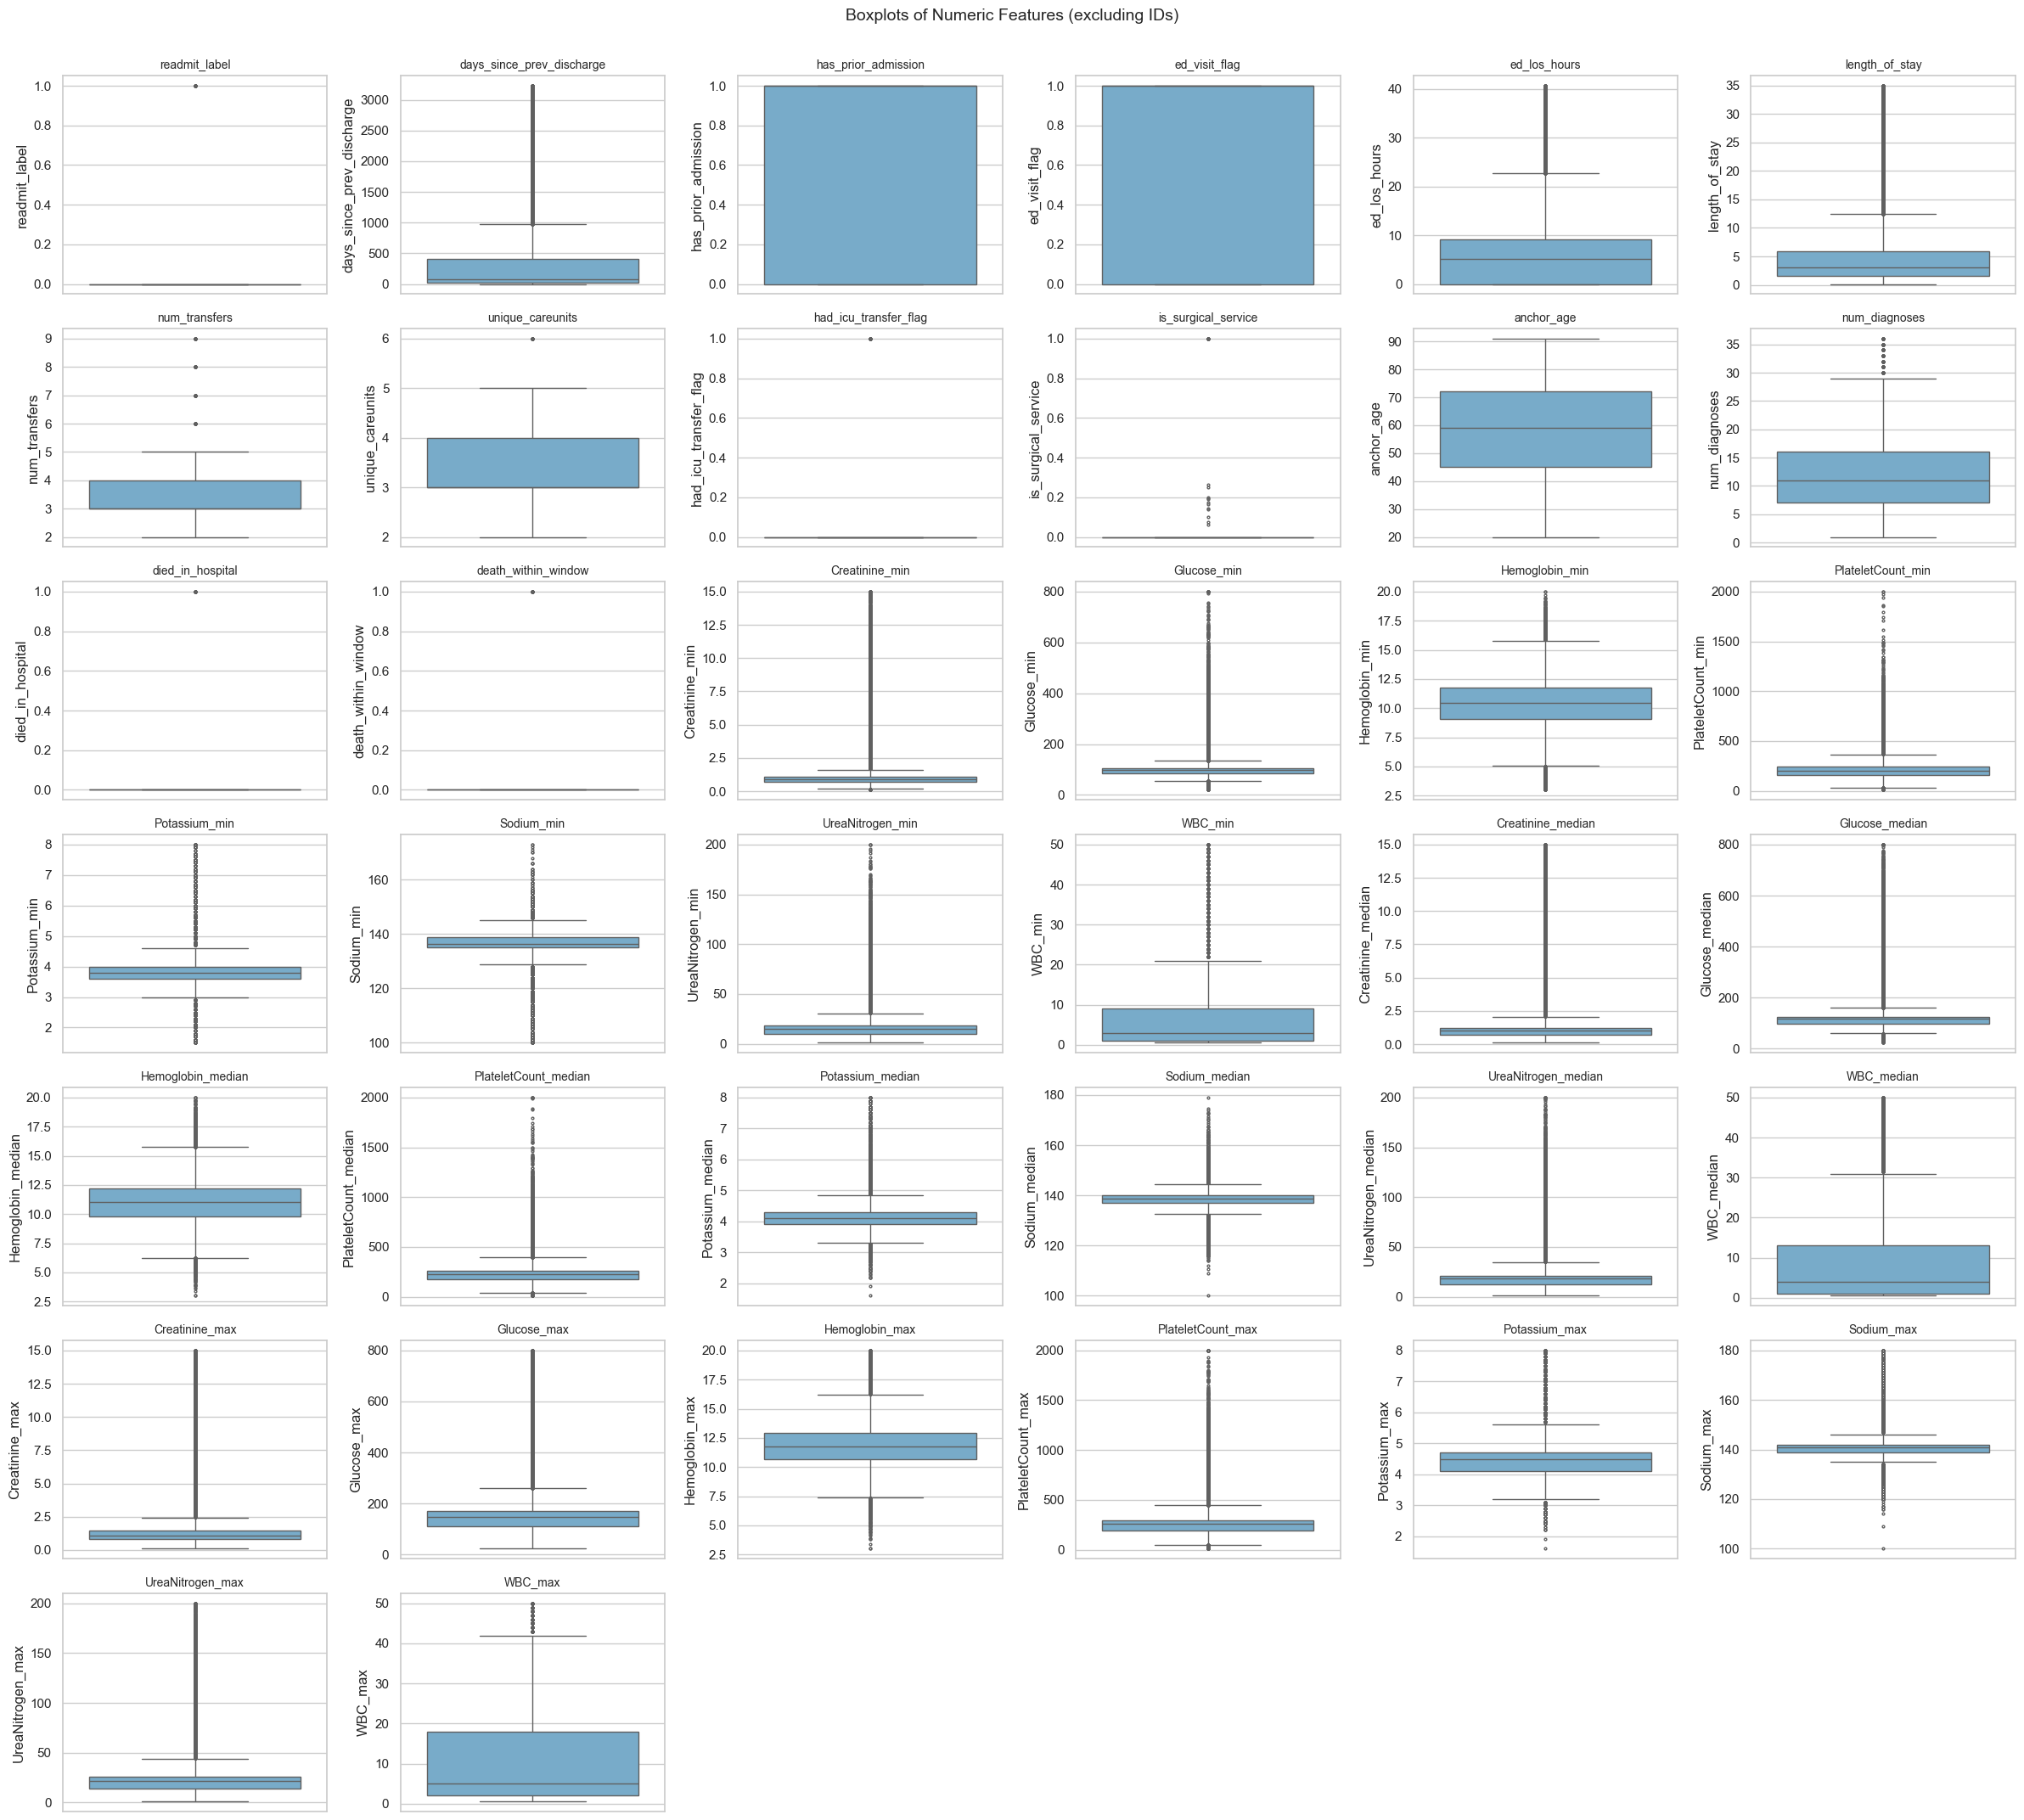

In [42]:
# 筛选数值列（排除 ID）
num_cols = df.select_dtypes(include=['float', 'int']).columns
num_cols = [c for c in num_cols if c not in ['hadm_id', 'subject_id']]

print(f"数值列数量: {len(num_cols)}")
print("示例列:", num_cols[:10])

# 统一绘图样式
sns.set(style="whitegrid", palette="pastel")

# 如果列很多，分批画（每行6个图）
cols_per_row = 6
num_plots = len(num_cols)
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 4, num_rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, cols_per_row, i)
    sns.boxplot(y=df[col], color="#6baed6", fliersize=2)
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots of Numeric Features (excluding IDs)", fontsize=14, y=1.02)
plt.show()
